In [37]:
# import os
import sys
import importlib

import keras.utils

sys.path.append("/mnt/d/aspiranture/Satellite_Imagery_Analysis/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/mnt/d/aspiranture/Satellite_Imagery_Analysis/Classification/dataset_tool/dataset_loader.py'>

In [38]:

dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (7248,)
COnfig path /mnt/d/aspiranture/Satellite_Imagery_Analysis/Classification/dataset_config
to_learch water,field,forest
Categories to learn: {'water': array([['/mnt/d/shared_folder/dataset_5_fixed/water/2/0/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-0-B01_(Raw).tiff',
        'water', '2', '0'],
       ['/mnt/d/shared_folder/dataset_5_fixed/water/2/0/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-0-B02_(Raw).tiff',
        'water', '2', '0'],
       ['/mnt/d/shared_folder/dataset_5_fixed/water/2/0/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-0-B03_(Raw).tiff',
        'water', '2', '0'],
       ...,
       ['/mnt/d/shared_folder/dataset_5_fixed/water/6/8/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-8-B11_(Raw).tiff',
        'water', '6', '8'],
       ['/mnt/d/shared_folder/dataset_5_fixed/water/6/8/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-8-B12_(Raw).tiff',
        'water', '6', '8'],
       ['/mnt/d/shared_folder/dataset_5_fixed/wat

### Update shapes

In [3]:
dataset.x_test.shape[0]

318760

In [343]:
x_data_1 = dataset.x_train[:311*64*64,:]

In [610]:
x_data_1.max()

0.6549019607843137

In [344]:
x_train_transformed_1 = x_data_1.reshape(311, 64*64,12)

In [345]:
x_train_transformed = x_train_transformed_1.reshape(311, 64,64,12)

In [346]:
x_train_transformed.shape

(311, 64, 64, 12)

In [347]:
y_data_1 = dataset.y_train[:311*64*64]
y_train_transformed_1 = y_data_1.reshape(311, 64*64)
y_train_transformed = y_train_transformed_1.reshape(311, 64,64)

In [348]:
x_data_2 = dataset.x_test[:77*64*64,:]
x_test_transformed_1 = x_data_2.reshape(77, 64*64,12)
x_test_transformed =  x_test_transformed_1.reshape(77, 64,64,12)


In [349]:
y_data_2 = dataset.y_train[:77*64*64]
y_test_transformed_1 = y_data_2.reshape(77, 64*64)
y_test_transformed = y_test_transformed_1.reshape(77, 64,64)

In [9]:
# from keras.layers import *
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from keras.callbacks import EarlyStopping, ModelCheckpoint

ModuleNotFoundError: No module named 'keras.layers.convolutional'

In [45]:
import tensorflow as tf

In [11]:
tf.config.experimental.list_physical_devices('GPU')

2023-09-21 12:35:43.670964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-21 12:35:44.049107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-21 12:35:44.049169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from osgeo import gdal

In [37]:
import rasterio as rio

In [ ]:
#/mnt/d/shared_folder/dataset_5/water/2/0/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-0-B01_(Raw).tiff

In [17]:
dataset = gdal.Open('/home/andrew/tst.tiff', gdal.GA_ReadOnly)

In [11]:
from tifffile import imread

In [15]:
file = imread("/mnt/d/shared_folder/dataset_5/water/2/0/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A-0-B06_(Raw).tiff")

<tifffile.TiffFile '2022-10-11-00_0…0-B06_(Raw).tiff'> <asarray> failed to reshape (0,) to (50, 50, 3), raised ValueError('cannot reshape array of size 0 into shape (50,50,3)')


In [13]:
from tensorflow.keras.layers import *

In [ ]:
tf.keras.layers.Activation

In [350]:
model_new = tf.keras.models.Sequential([
    Conv2D(64,(3,3),padding='same',input_shape=(64,64,12)),
    Conv2D(64,(3,3),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    Dropout(0.5),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    Conv2D(256,(3,3), padding='same'),
    Conv2D(256,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Flatten(),
    #Dense(128),
    Activation('relu'),
    Dropout(0.5),
    #Reshape((4,4,128)),
    UpSampling2D((2,2)),
    Conv2D(256,(3,3), padding='same'),
    Conv2D(256,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.5),
    Conv2D(128,(3,3), padding='same'),
    Conv2D(128,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.5),
    Conv2D(64,(3,3), padding='same'),
    Conv2D(64,(3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(4,3,padding='same'),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

In [351]:
model_new.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [352]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 64, 64, 64)        6976      
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_12 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 64)       

In [353]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=70,      # Random rotations between 0 and 40 degrees
    width_shift_range=0.2,  # Random horizontal shift up to 20%
    height_shift_range=0.2, # Random vertical shift up to 20%
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Random zooming up to 20%
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # How to fill missing pixels after transformation
)

In [354]:
import numpy as np

In [355]:
augmented_data = []

for img in x_train_transformed:  # Assuming x_data is your numpy array
    img = img.reshape((1,) + img.shape)  # Reshape image to (1, 64, 64, 12)
    i = 0
    for batch in datagen.flow(img, batch_size=1):  # Generate augmented images
        augmented_data.append(batch[0])
        i += 1
        if i >= 3:  # Generate 3 augmented images for each original image
            break

# Convert the augmented data back to a numpy array
augmented_data = np.array(augmented_data)


/home/andrew/miniconda3/envs/segmentation-new/lib/python3.11/site-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 64, 64, 12) (12 channels).
  warnings.warn(


In [356]:
x_data_combined = np.vstack((x_train_transformed, augmented_data))


In [357]:
x_data_combined.shape

(1244, 64, 64, 12)

In [358]:
num_toextend = x_data_combined.shape[0]/x_train_transformed.shape[0]
num_toextend

4.0

In [359]:
import numpy as np

y_data_augmented = np.repeat(y_train_transformed, num_toextend, axis=0)

In [360]:
y_data_train_cate = tf.keras.utils.to_categorical(y_data_augmented)

In [361]:
y_data_train_cate.shape

(1244, 64, 64, 4)

In [362]:
tf_dataset = tf.data.Dataset.from_tensor_slices((x_data_combined, y_data_train_cate))

In [363]:
tf_dataset = tf_dataset.shuffle(buffer_size=2000).batch(128).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [419]:
history2 = model_new.fit(tf_dataset, epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 162ms/step - loss: 0.0695 - accuracy: 0.9770
Epoch 2/100
10/10 [==============================] - 2s 167ms/step - loss: 0.0505 - accuracy: 0.9812
Epoch 3/100
10/10 [==============================] - 2s 166ms/step - loss: 0.0631 - accuracy: 0.9789
Epoch 4/100
10/10 [==============================] - 2s 162ms/step - loss: 0.0412 - accuracy: 0.9852
Epoch 5/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0385 - accuracy: 0.9856
Epoch 6/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0438 - accuracy: 0.9833
Epoch 7/100
10/10 [==============================] - 2s 169ms/step - loss: 0.0329 - accuracy: 0.9873
Epoch 8/100
10/10 [==============================] - 2s 171ms/step - loss: 0.1307 - accuracy: 0.9561
Epoch 9/100
10/10 [==============================] - 2s 166ms/step - loss: 0.0633 - accuracy: 0.9761
Epoch 10/100
10/10 [==============================] - 2s 167ms/step - loss: 0.0433 - accura

In [515]:
pred = model_new.predict(x_test_transformed)

3/3 [==============================] - 0s 163ms/step


In [516]:
pred_cat = tf.argmax(pred, axis=-1)

In [517]:
model_new.save("segmenteation_89.keras")

In [632]:
from sklearn.metrics import accuracy_score, classification_report

In [519]:
accuracy_score(pred_cat.numpy().flatten(), y_test_transformed.flatten())

0.8992745535714286

In [633]:
classification_report(pred_cat.numpy().flatten(), y_test_transformed.flatten())

/home/andrew/miniconda3/envs/segmentation-new/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/miniconda3/envs/segmentation-new/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/miniconda3/envs/segmentation-new/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

'              precision    recall  f1-score   support\n\n           1       0.84      0.97      0.90    107880\n           2       0.94      0.90      0.92    198457\n           3       0.00      0.00      0.00      9055\n\n    accuracy                           0.90    315392\n   macro avg       0.59      0.62      0.61    315392\nweighted avg       0.88      0.90      0.89    315392\n'

In [68]:
inputs = Input(shape=(32,32,12))
x = Conv2D(32, 3,strides=2, padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)
# x = SpatialDropout2D(0.5)(x)

previous_block_activation = x

for filters in [64, 128, 256]:
    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(filters, 3, strides=2, padding="same")(previous_block_activation)
    x = add([x, residual])
    #x = Dropout(0.3)(x)
    previous_block_activation = x

for filters in [256, 128, 64, 32]:
    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(2)(x)

    residual = UpSampling2D(2)(previous_block_activation)
    residual = Conv2D(filters, 3, padding="same")(residual)
    x = add([x, residual])  # Add back residual
    #x = Dropout(0.3)(x)
    previous_block_activation = x

outputs = Conv2D(4, 3, activation="softmax", padding="same")(x)
#outputs = Reshape((20,20,6))(outputs)
outputs = Activation("relu")(outputs)
#outputs = Reshape((10,10,6))(outputs)

In [70]:
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 12)]         0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 16, 16, 32)           3488      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 32)           128       ['conv2d_39[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation_24 (Activation)  (None, 16, 16, 32)           0         ['batch_normalization[0][0

### Check on real image

In [569]:
    from glob import glob
    image_bands_1 = glob("/mnt/d/shared_folder/test3/*B?*.tiff", recursive=True)
    image_bands_1.sort()
    image_bands_1

['/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/mnt/d/shared_folder/test3/2022-10-11-00_00_2022

In [570]:
import rasterio as rio

In [571]:
test_imgs_list = []

for tst_img in image_bands_1:
    with rio.open(tst_img,'r') as img_file:
        img_array = img_file.read(1)
        test_imgs_list.append(img_array)

test_imgs_array = np.asarray(test_imgs_list)

In [562]:
test_imgs_array = test_imgs_array/255

In [572]:
import earthpy.plot as ep

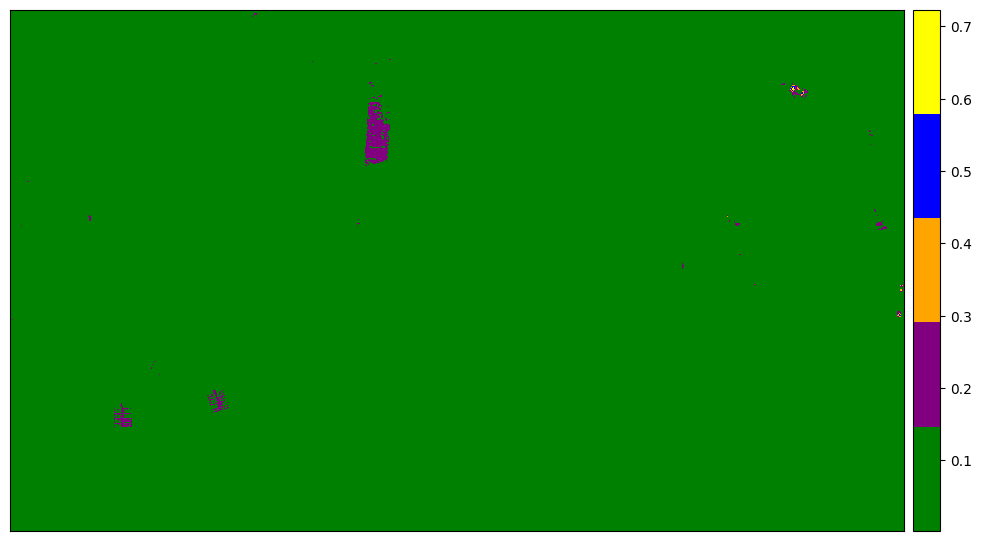

<Axes: >

In [573]:
from matplotlib.colors import ListedColormap

ep.plot_bands(test_imgs_array[2],
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [574]:
test_image_shape = test_imgs_array[0].shape
test_image_shape

(638, 1094)

In [575]:
import math

In [576]:
test_image_shape_0_parts = math.floor(test_image_shape[0]/64)
test_image_shape_1_parts = math.floor(test_image_shape[1]/64)
print(f"x: {test_image_shape_0_parts} y: {test_image_shape_1_parts}")

x: 9 y: 17


In [577]:
test_imgs_fixed_list = []
for img in test_imgs_array:
    test_img_fixed_new = img[:64*test_image_shape_0_parts, :64*test_image_shape_1_parts]
    test_imgs_fixed_list.append(test_img_fixed_new)
test_imgs_fixed_array = np.asarray(test_imgs_fixed_list)

In [578]:
test_imgs_fixed_array.shape

(12, 576, 1088)

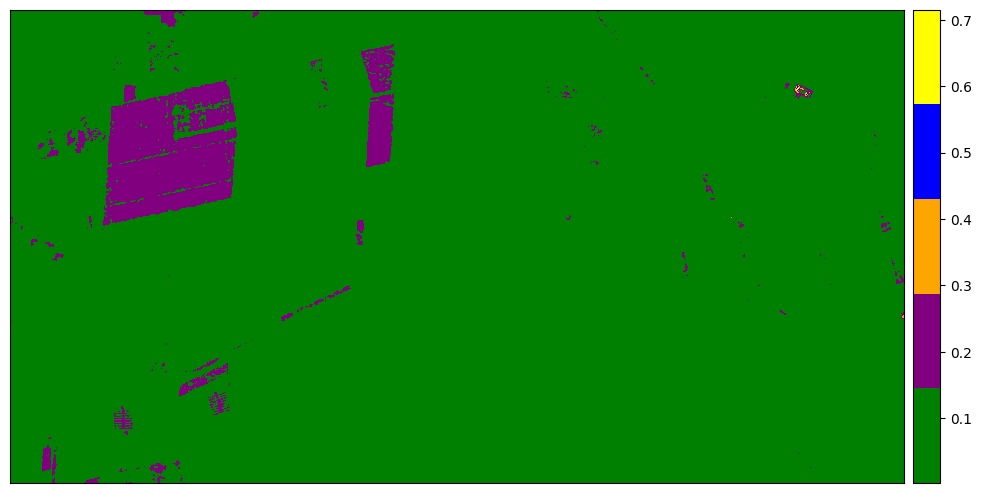

<Axes: >

In [579]:
ep.plot_bands(test_imgs_fixed_array[3],
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [580]:
test_vectors = []

for tst_img in test_imgs_fixed_array:
    tst_img_vec = tst_img.flatten()
    test_vectors.append(tst_img_vec)

test_vectors_np = np.asarray(test_vectors)


In [581]:
test_restored_from_vector = test_vectors_np[3].reshape(64*test_image_shape_0_parts, 64*test_image_shape_1_parts)

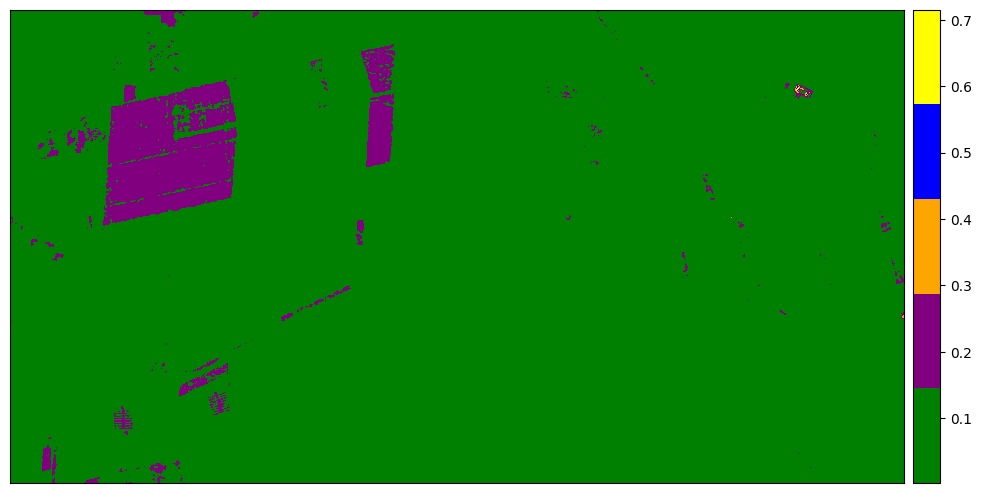

<Axes: >

In [582]:
ep.plot_bands(test_restored_from_vector,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [583]:
test_vectors_np.max()

0.7232

In [584]:
# test_vectors_np = test_vectors_np/255

In [585]:
test_vectors_np.shape

(12, 626688)

In [586]:
test_vectors_np = np.moveaxis(test_vectors_np, -1, 0)

In [587]:
test_restored_from_vector_2 = test_vectors_np[:,3].reshape(64*test_image_shape_0_parts, 64*test_image_shape_1_parts)

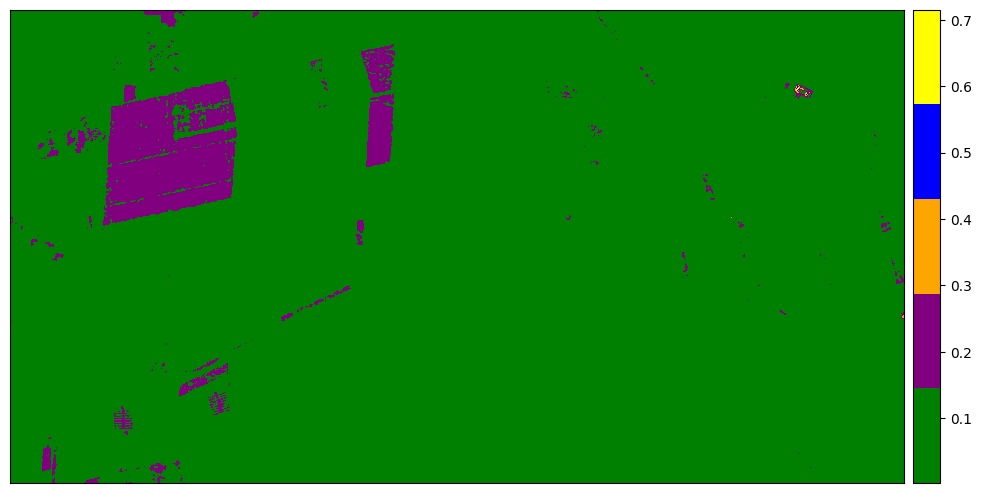

<Axes: >

In [588]:
ep.plot_bands(test_restored_from_vector_2,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [589]:
test_vectors_np.shape

(626688, 12)

In [590]:
n = int(test_vectors_np.shape[0] / (64*64))
n

153

In [591]:
x_predict_reshaped_1 = test_vectors_np.reshape((n, 64*64,12))

In [592]:
x_predict_reshaped_2 = x_predict_reshaped_1.reshape((n, 64, 64,12))

In [593]:
x_predict_reshaped_2.shape

(153, 64, 64, 12)

In [594]:
x_predict_reshaped_3 = x_predict_reshaped_2[:,:,:,3]

In [595]:
x_predict_reshaped_3.shape

(153, 64, 64)

In [596]:
x_predict_reshaped_3_r_1 = x_predict_reshaped_3.reshape(n,64*64)

In [597]:
x_predict_reshaped_3_r_2 = x_predict_reshaped_3_r_1.reshape(n*64*64)

In [598]:
#x_predict_reshaped_3_r = np.reshape(x_predict_reshaped_3, (x_predict_reshaped_3.shape[0], -1)).flatten()
x_predict_reshaped_3_rr = x_predict_reshaped_3_r_2.reshape(64*test_image_shape_0_parts, 64*test_image_shape_1_parts)

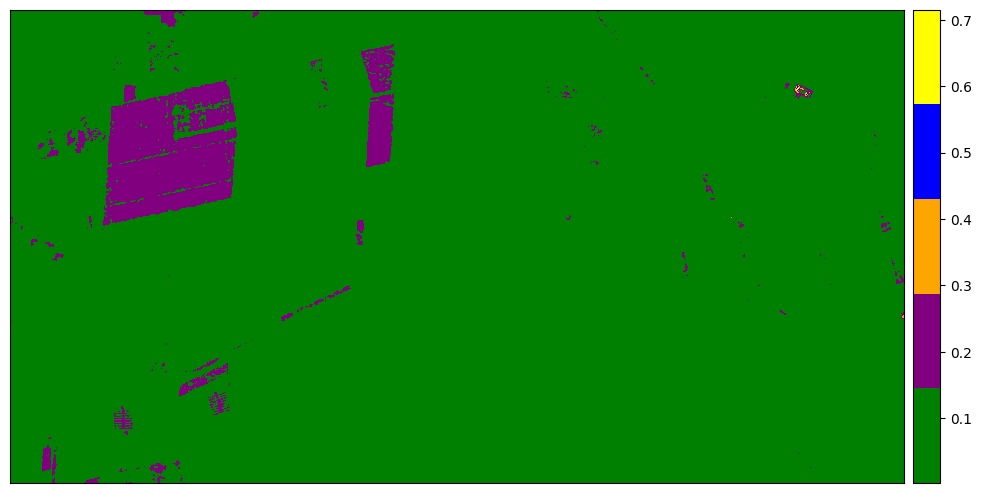

<Axes: >

In [599]:
ep.plot_bands(x_predict_reshaped_3_rr,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [600]:
test_predict_result = model_new.predict(x_predict_reshaped_2)

5/5 [==============================] - 0s 100ms/step


array([8.4091015e-12, 9.9947244e-01, 5.2752689e-04, 2.6369109e-09],
      dtype=float32)

In [601]:
test_predict_result.shape

(153, 64, 64, 4)

In [602]:
test_predict_result_categorized = tf.argmax(test_predict_result, axis=3).numpy()

In [603]:
test_predict_result_categorized.max()

2

In [604]:
test_predict_result_categorized.shape

(153, 64, 64)

In [605]:
#test_predict_result_categorized_vector = np.reshape(test_predict_result_categorized, (test_predict_result_categorized.shape[0], -1)).flatten()
test_predict_result_categorized_1 = test_predict_result_categorized.reshape(n, 64 * 64)
test_predict_result_categorized_2 = test_predict_result_categorized_1.reshape(n * 64 * 64)
#x_predict_reshaped_3_r = np.reshape(x_predict_reshaped_3, (x_predict_reshaped_3.shape[0], -1)).flatten()
test_predict_result_categorized_image = test_predict_result_categorized_2.reshape(64 * test_image_shape_0_parts, 64 * test_image_shape_1_parts)

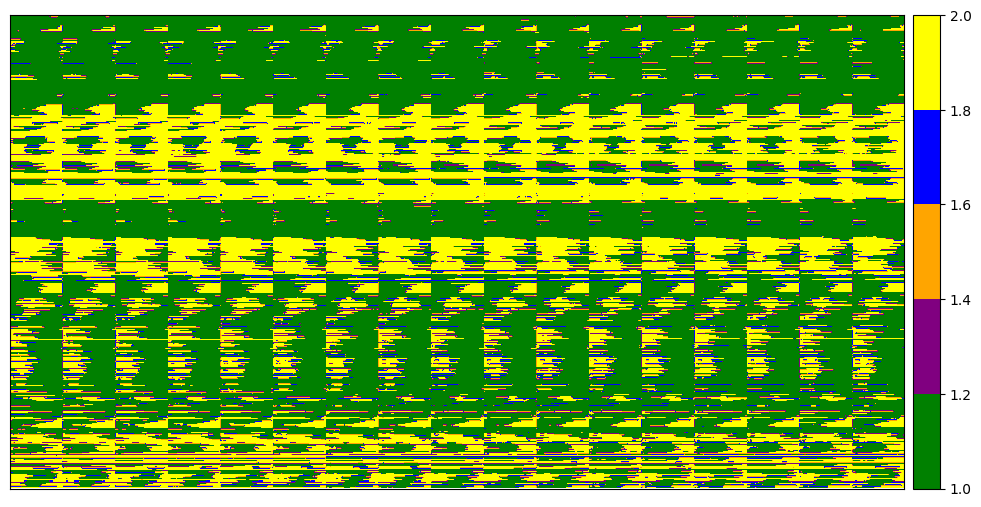

<Axes: >

In [606]:
from matplotlib.colors import ListedColormap

ep.plot_bands(test_predict_result_categorized_image,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [611]:
def createImageCubes(img_array, blk_width,blk_height):
    arrray = []
    imageShape = img_array.shape
    for w in range(0,imageShape[0],blk_width):
        for h in range(0, imageShape[1], blk_height):
            arrr = img_array[w:w+blk_width,h:h+blk_height]
            arrray.append(np.asarray(arrr))
    return np.asarray(arrray)

In [618]:
cubes_list = []
for lstt in test_imgs_fixed_array:
    cubes = createImageCubes(lstt,64,64)
    cubes_list.append(cubes)
cubes_array = np.asarray(cubes_list)

In [619]:
cubes_array = np.moveaxis(cubes_array, 0, 3)

In [620]:
cubes_array.shape

(153, 64, 64, 12)

In [621]:
resss = model_new.predict(cubes_array)

5/5 [==============================] - 0s 74ms/step


In [622]:
def imageFromCube(cubes, imageWidth, imageHeight):
    arrrr = np.empty((imageWidth, imageHeight,12))
    cubesShape = cubes.shape
    items_per_row = int(imageWidth/cubesShape[1])
    items_per_col = int(imageHeight/cubesShape[2])
    for el in range(0,cubesShape[0]):
        num_row = int(el/items_per_col)
        num_col = int(el%items_per_col)
        #print("Row: ", num_row, " column: ", num_col)
        for i in range(0,cubesShape[1]):
            for j in range(0, cubesShape[2]):
                x = int(i+num_row*cubesShape[1])
                y = int(j+num_col*cubesShape[2])
                #print("X: ", x, " Y: ", y)
                arrrr[x,y] = cubes[el,i,j]
        #arrrr[num_row, num_col] = cubes[el,:, :, :]
        #num_col = int(int(el*cubesShape[1]%imageWidth)/imageHeight)
    return arrrr

In [623]:
resss_pred = tf.argmax(test_predict_result, axis=3).numpy()

In [625]:
resss_pred.shape

(153, 64, 64)

In [626]:
resss_img = imageFromCube(resss_pred,576,1088)

In [628]:
resss_img.shape

(576, 1088, 12)

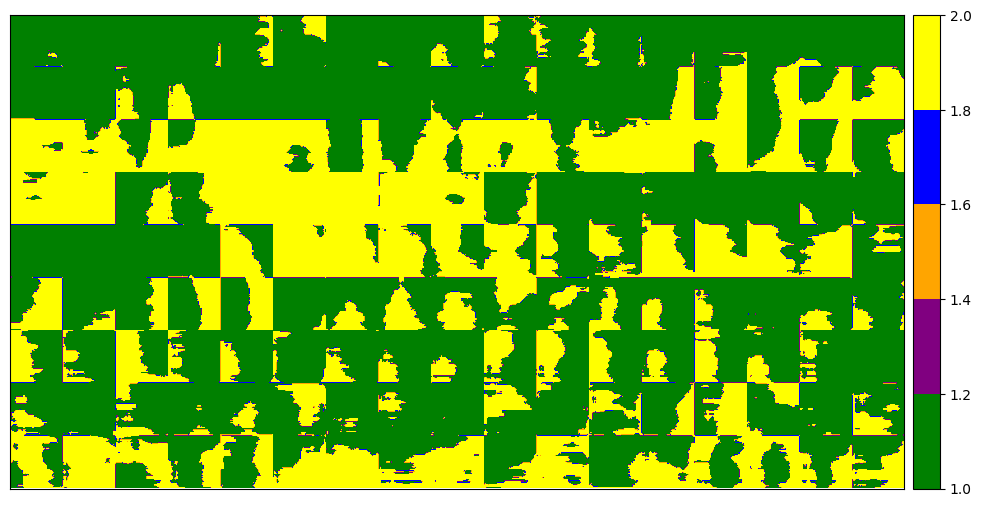

<Axes: >

In [630]:
ep.plot_bands(resss_img[:,:,0],
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))